# Entropy-regularized Optimal Transport

This refers to the following paper by Cuturi:
> Cuturi, M. (2013). 
> Sinkhorn distances: Lightspeed computation of optimal transport. 
> In Advances in Neural Information Processing Systems (pp. 2292-2300).

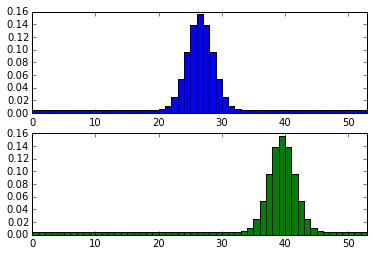

In [1]:
%matplotlib inline
import pylab
import numpy
from scipy.signal import gaussian
from scipy.spatial.distance import cdist

n = 53
h1 = gaussian(n, std=2.)
h2 = gaussian(int(1.5 * n), std=2.)[:n]
x = numpy.arange(n)
h1 += .03
h2 += .03
h1 /= numpy.sum(h1)
h2 /= numpy.sum(h2)
h1 = h1.reshape((-1, 1))
h2 = h2.reshape((-1, 1))

pylab.subplot(2, 1, 1)
_ = pylab.bar(x, h1, width=1., color="b")
_ = pylab.xlim(0, n)
pylab.subplot(2, 1, 2)
_ = pylab.bar(x, h2, width=1., color="g")
_ = pylab.xlim(0, n)

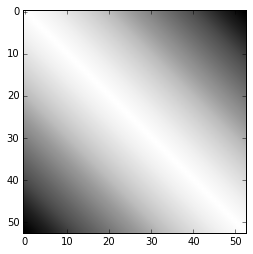

In [2]:
m = cdist(numpy.linspace(0, 1, n).reshape((-1, 1)), numpy.linspace(0, 1, n).reshape((-1, 1)))
_ = pylab.imshow(m, cmap=pylab.cm.Greys)

Then, it is time to define a Sinkhorn iteration:

In [3]:
def one_iter(a, b, p, q, xi):
    a_out = p / numpy.dot(xi, b)
    b_out = q / numpy.dot(xi.T, a)
    return a_out, b_out

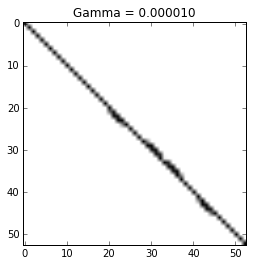

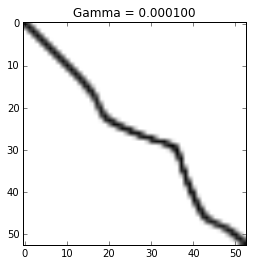

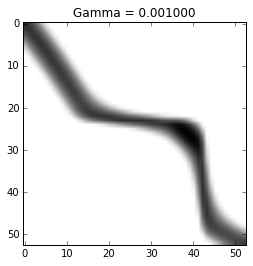

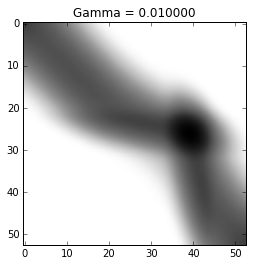

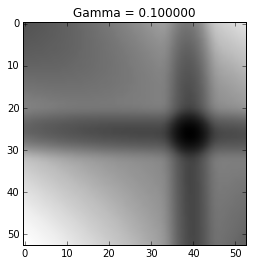

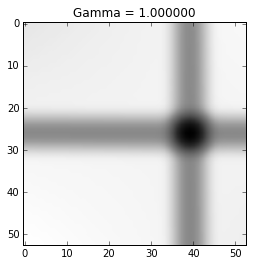

In [4]:
for gamma in [.00001, .0001, .001, .01, .1, 1.]:
    a = numpy.ones((n, 1))
    b = numpy.ones((n, 1))
    pylab.figure()
    xi = numpy.exp(-m ** 2 / gamma)
    for _ in range(100):
        a, b = one_iter(a, b, h1, h2, xi)
    pi = numpy.dot(numpy.dot(numpy.diagflat(a), xi), numpy.diagflat(b))
    _ = pylab.imshow(numpy.log(pi + 1e-6), cmap=pylab.cm.Greys)
    _ = pylab.title("Gamma = %f" % gamma)

## Optimal transport as a metric between empirical distributions (aka sets)

Here, we have two sets of points (green ones and blue ones) and want to assess similarity between the sets.

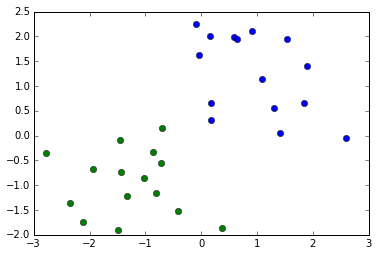

In [5]:
n = 15
set1 = numpy.random.randn(n, 2) * .8 + 1.
set2 = numpy.random.randn(n, 2) * .8 - 1.

p1 = numpy.ones((n, 1)) / n
p2 = numpy.ones((n, 1)) / n

_ = pylab.plot(set1[:, 0], set1[:, 1], "bo")
_ = pylab.plot(set2[:, 0], set2[:, 1], "go")

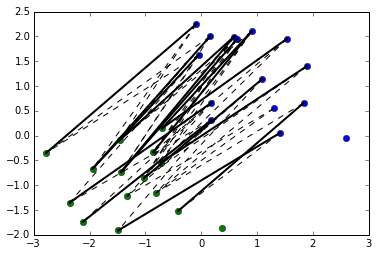

In [6]:
m = cdist(set1, set2)
gamma = .1
xi = numpy.exp(-m ** 2 / gamma)

a = numpy.ones((n, 1))
b = numpy.ones((n, 1))
for _ in range(100):
    a, b = one_iter(a, b, p1, p2, xi)
pi = numpy.dot(numpy.dot(numpy.diagflat(a), xi), numpy.diagflat(b))

indices_match = numpy.argmax(pi, axis=1)

_ = pylab.plot(set1[:, 0], set1[:, 1], "bo")
_ = pylab.plot(set2[:, 0], set2[:, 1], "go")

# First, strong matches
idxi, idxj = numpy.nonzero(pi > numpy.percentile(pi, 100 * (n - 1) / n))
for i, j in zip(idxi, idxj):
    _ = pylab.plot([set1[i, 0], set2[j, 0]], [set1[i, 1], set2[j, 1]], "k-", linewidth=2)

# Then, weak ones
idxi, idxj = numpy.nonzero(pi > numpy.percentile(pi, 100 * (n - 3) / n))
for i, j in zip(idxi, idxj):
    _ = pylab.plot([set1[i, 0], set2[j, 0]], [set1[i, 1], set2[j, 1]], "k--", linewidth=1)